# Testing Unique Key Steg

Our unique key is key = "1010101010". We are testing and going to decode the information using this key and a different key.

# First let's encode an image with a text

In [18]:
# Imports
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [19]:
def message_to_bin(message):
    """Convert a message to binary."""
    return ''.join(format(ord(char), '08b') for char in message)

def encode_image(image_path, secret_message, key):
    img = Image.open(image_path)
    binary_message = message_to_bin(secret_message) + '1111111111111110'  # Adding a delimiter
    if img.mode != 'RGB':
        print("Image mode needs to be RGB")
        return False
    encoded = img.copy()
    width, height = img.size
    index = 0
    for row in range(height):
        for col in range(width):
            if index < len(binary_message):
                pixel = list(img.getpixel((col, row)))
                for n in range(3):  # Assume RGB
                    if index < len(binary_message):
                        pixel[n] = pixel[n] & ~1 | int(binary_message[index], 2) ^ int(key[index % len(key)], 2)
                        index += 1
                encoded.putpixel((col, row), tuple(pixel))
            else:
                break
        else:
            continue
        break
    return encoded

secret_msg = "I'm hungry"
cover_img_path = r"Images/Steg2.jpg"
key = "1010101010"  # Unique key
encoded_image = encode_image(cover_img_path, secret_msg, key)
encoded_image.save("Steg_1010101010.png")

def save_image(image, folder, filename):
    if not os.path.exists(folder):
        os.makedirs(folder)
    image.save(os.path.join(folder, filename))

save_image(encoded_image, "Encoded Images", "Steg_1010101010.png")

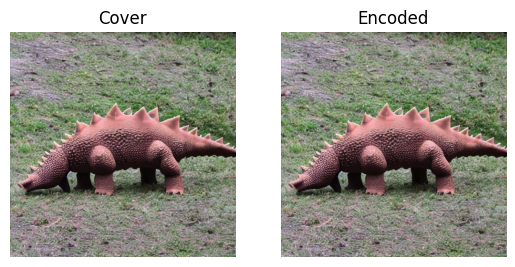

In [20]:
def display_images(image_paths, labels):
    fig, axes = plt.subplots(1, len(image_paths))
    for ax, img_path, label in zip(axes, image_paths, labels):
        img = Image.open(img_path)
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(label)
    plt.show()

display_images([cover_img_path, "Encoded Images/Steg_1010101010.png"], ["Cover", "Encoded"])

# Decoding it with the key!
It works!

In [21]:
def bin_to_message(binary):
    """Convert binary data to message."""
    message = []
    for i in range(0, len(binary), 8):
        byte = binary[i:i+8]
        message.append(chr(int(byte, 2)))
    return ''.join(message)

def decode_image(image_path, key):
    img = Image.open(image_path)
    binary_message = ''
    width, height = img.size
    for row in range(height):
        for col in range(width):
            pixel = list(img.getpixel((col, row)))
            for n in range(3):
                binary_message += str(pixel[n] & 1 ^ int(key[len(binary_message) % len(key)], 2))
                if binary_message[-16:] == '1111111111111110':  # Check for delimiter
                    return bin_to_message(binary_message[:-16])
    return "No hidden message found."

key = "1010101010"
encoded_image_path = r"Encoded Images/Steg_1010101010.png"

decoded_message = decode_image(encoded_image_path, key)
print(decoded_message)

I'm hungry


# Different key?
Didn't work!

In [22]:
key = "1010101011"
encoded_image_path = r"Encoded Images/Steg_1010101010.png"

decoded_message = decode_image(encoded_image_path, key)
print(decoded_message)

Ig}$iu.wvxÿ¾ê¬z¯DÎ¡¶' 	Z	fD8ÀÑ	3'@üw2T¶@ÉWfVÚC®Év;Ã,Û9gñ-þEÝk<vd³¼c\èÅáôotkq£DÆ|	.¬)aËn8¸nSaÝãì÷Mð¿P6_®¥äVG!AÀ5ï´7HÇjóøÔÚVÞí¦ ä EÚõö Aèuá* 4Ù\z­âÞ"KKcõÞÂãÚI=x½÷Ùü·ñ~Îèãqï(á¿&/5Y½ÀÄA`ÍÑF\+[ ®ù§Æs2\yë	TT9ÁJB#¡ýã«»@
ã®
~± ¡¦JKï°
XÃ:ÚljhÃ8c{w]×â2ÌW®KßÃ/º. V*H-)é£~Þ¶®ÍçÜãrÃú2SÃN(çõx0è)ø+ßÍVoÂA_áhÔ)mÈà:ÂDaÇÜ¦×xHG]ôè`¶N®¶ ê«"81TÚª×8ÊÒË!'ÙÀÁ=f(?>åKñþÒvQZë0@+>9¶õÅ#óGÝ ÛLj®1Çiâ`Kl ön{«DÆÑb¿óõ~;HÂ[ór«08bÙÔêßLhre¨xå¨AÝzÄ¨=U¿	a· Z¦íg±a}=UÌ{ÄÞßE
ß±QPU
¹UkKãXSÆËÛ#XÌ¡E0£I¹¿iñ=¿Ez-©mýn~áè5}roÚN2.Æp"ê1«Új/_lYæ¦9ËMo+±x) 
£j¥Ä«4Ápqè¨±\Û¡¹òÃ,->^:¬+P»«deüµx¼r7  Êîy(gÆIöã\MË{©Y0ºërY!cÕÉÛC°ÜÓ-Q¥ê´ßÐP :»ºQ$j:)÷©î"`áPÄRÓÈÁ#-CÑÌß|Tê-T°Ø*É°)Ã¤Þ³§ÇAro÷­&=Æ±p"z¥ÚfËiH)uÖ§"_I&?å·*UøÆï¬wxÂ±QÌ¾<B8K9<ZÝµ¥ÆÇ±¸¼;·Õ²?[ãc·æ;ÿCH»#²ì}ØêÇg 
éK9 ¼ ò(¬,go:Â-6Í&¿¢³vºÜKÕ@îm~ãÀÌÀ[ó2Ú7®ØtqXùu¬²¸nóÜºèÀÄÚÀ2Õ8ð!m³jpdg4qÿ¸óiÂ rì1ûÊ(

# Image that has no decoded message?
Works!

In [23]:
key = "1010101010"
encoded_image_path = r"Images/StegPic.jpg"

decoded_message = decode_image(encoded_image_path, key)
print(decoded_message)

No hidden message found.
